# Income Prediction

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields
The dataset contains 16 columns

Target filed: Income
-- The income is divide into two classes: <=50K and >50K

Number of attributes: 14
-- These are the demographics and other features to describe a person

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.


fnlwgt: (continuous)final weight: In other words, this is the number of people the census believes the entry represents. Integer greater than 0

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United - States

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data=pd.read_csv('/content/adult.csv')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.shape

(48842, 15)

In [ ]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [ ]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


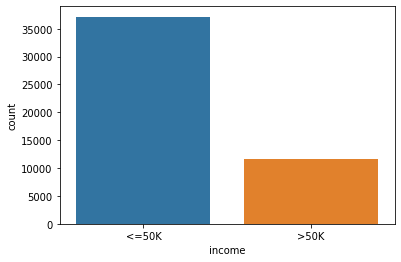

In [ ]:
sns.countplot(data.income)

In [ ]:
data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


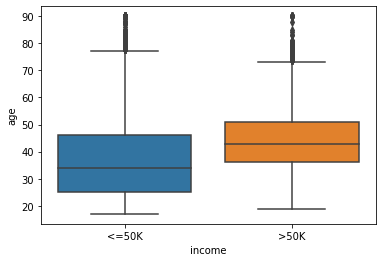

In [ ]:
sns.boxplot(data.income,data.age)

In [ ]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
data.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.income=data.income.replace(['<=50K', '>50K'],[0,1])

In [ ]:
data.income=data.income.replace()

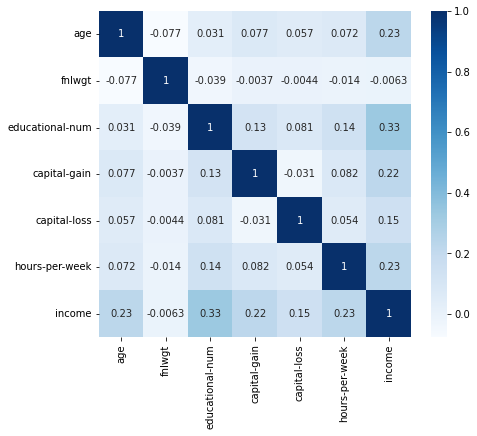

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [ ]:
data.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


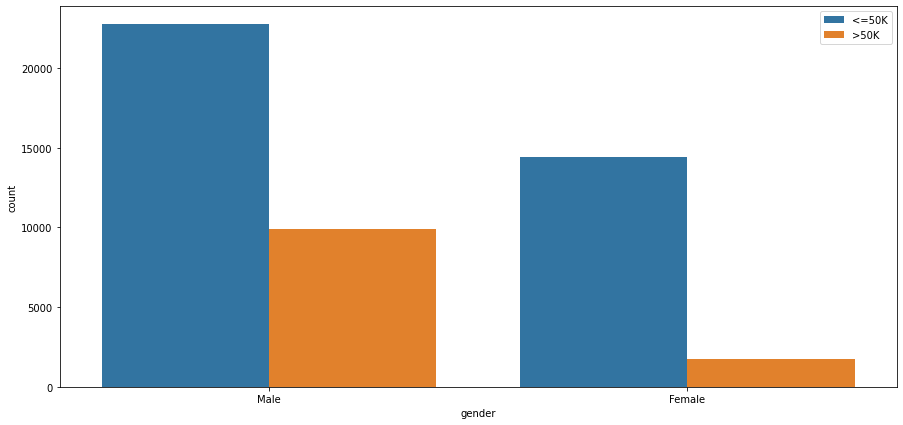

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data.gender,hue=data.income)
plt.legend(['<=50K', '>50K'])

In [ ]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
data['workclass']=data['workclass'].replace("?","None")

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['workclass'] = label_encoder.fit_transform(data['workclass']) 

In [ ]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education']) 

In [ ]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [ ]:
data['marital-status']=data['marital-status'].map({"Never-married":1,"Separated":2,"Widowed":3,"Married-spouse-absent":4,"Married-AF-spouse":5,"Divorced":6,"Married-civ-spouse":7})

In [ ]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
data['occupation']=data['occupation'].replace("?","None")

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['occupation'] = label_encoder.fit_transform(data['occupation']) 

In [ ]:
data['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['relationship'] = label_encoder.fit_transform(data['relationship']) 

In [ ]:
data["race"].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['race'] = label_encoder.fit_transform(data['race']) 

In [ ]:
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

In [ ]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
data['native-country']=data['native-country'].replace("?","None")

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['native-country'] = label_encoder.fit_transform(data['native-country'])

In [ ]:
data['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
x = data[['age','workclass','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','native-country']].values # independent features
y = data['income'].values # y -> target/true labels 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=192529)

In [ ]:
from sklearn.preprocessing import StandardScaler #scalling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score 

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10]: 
  knn = KNeighborsClassifier(i) 
  knn.fit(x_train,y_train) 
  print("K value  : " , i,"train_score;",knn.score(x_train,y_train), "test_score : ", np.mean(cross_val_score(knn, x_train, y_train,cv=10)))

K value  :  1 train_score; 0.936236801310363 test_score :  0.8024802796337749
K value  :  2 train_score; 0.8863962093070871 test_score :  0.8251483594842506
K value  :  3 train_score; 0.8904910936266051 test_score :  0.8283364603989922
K value  :  4 train_score; 0.8774752113252801 test_score :  0.8330747649652042
K value  :  5 train_score; 0.8777092047149668 test_score :  0.8357071478337332
K value  :  6 train_score; 0.8732925794846296 test_score :  0.8384273184426476
K value  :  7 train_score; 0.8719763666676417 test_score :  0.8385443716155425
K value  :  8 train_score; 0.8689929509491356 test_score :  0.8398897429108768
K value  :  9 train_score; 0.8669162596156659 test_score :  0.839363247511454
K value  :  10 train_score; 0.8647518207610635 test_score :  0.841235079977635


K=10 Have high test score.so, we use that.

In [ ]:
knn=KNeighborsClassifier(10)#knn model taining
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8416706476489456